# Customer Lifetime Value 

In [3]:
#Import necessary libraries
import pandas as pd
import matplotlib as plt
from lifetimes.plotting import *
from lifetimes.utils import *

#Import Data
tx_data=pd.read_csv("Retail_Final_Dataset (2).csv")
tx_data.head()

C:\Users\SHAHAMOH\AppData\Local\Temp\ipykernel_16212\1880927607.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tx_data=pd.read_csv("Retail_Final_Dataset (2).csv")


,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,...,Service_time(min),Total service charge,TV,Total_amt_Tv_adv(IRP),Newspaper,Total_amt_News_adv(IRP),Digital,Total_amt_digital_adv(IRP),Aquistion_amt,Total_amount_for_advertisement
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 00:00,6.95,13085,United Kingdom,12,...,2,1.0,1,3.19,0,0.26,1,0.15,2,3.6
1,1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,12,...,5,2.5,0,3.19,1,0.26,1,0.15,2,3.6
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,12,...,0,0.0,0,3.19,0,0.26,1,0.15,1,3.6
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085,United Kingdom,12,...,1,0.5,1,3.19,1,0.26,0,0.15,2,3.6
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085,United Kingdom,12,...,5,2.5,1,3.19,1,0.26,0,0.15,2,3.6


In [3]:
tx_data["Customer ID"].unique

<bound method Series.unique of 0         13085
1         13085
2         13085
3         13085
4         13085
          ...  
791554    12680
791555    12680
791556    12680
791557    12680
791558    12680
Name: Customer ID, Length: 791559, dtype: int64>

In [4]:
#Check the shape (number of columns and rows) in the dataset
tx_data.shape

(791559, 30)

In [5]:
#Find out missing values
tx_data.isnull().sum(axis=0)

Unnamed: 0                        0
Invoice                           0
StockCode                         0
Description                       0
Quantity                          0
InvoiceDate                       0
Price                             0
Customer ID                       0
Country                           0
Month                             0
Year                              0
Offer1                            0
Total_amt_offer1(10%)             0
Offer2                            0
Total_amt_offer(8%)               0
Offer3                            0
Total_amt_offer3(5%)              0
Total_offer_amount                0
Total Retained cost               0
Total_amt_retained_cost           0
Service_time(min)                 0
Total service charge              0
TV                                0
Total_amt_Tv_adv(IRP)             0
Newspaper                         0
Total_amt_News_adv(IRP)           0
Digital                           0
Total_amt_digital_adv(IRP)  

In [4]:
#Remove time from date
tx_data1 = pd.to_datetime(tx_data['InvoiceDate'], format="%d-%m-%Y %H:%M").dt.date
tx_data['InvoiceDate'] = tx_data1

In [5]:
tx_data.to_csv("Retail_final_dataset_3.csv",index=False)

In [2]:
#Remove time from date
tx_data1 = pd.to_datetime(tx_data['InvoiceDate'], format="%d-%m-%Y %H:%M").dt.date
tx_data['InvoiceDate'] = tx_data1

#There are 135,080 missing values in the CustomerID column, and since our analysis is based on customers, 
#we will remove these missing values.
tx_data = tx_data[pd.notnull(tx_data['Customer ID'])]

#Keep records with non negative quantity
tx_data = tx_data[(tx_data['Quantity']>0)]

#Add a new column depicting total sales
tx_data['Total_Sales'] = tx_data['Quantity'] * tx_data['Price']
necessary_cols = ['Customer ID', 'InvoiceDate', 'Total_Sales']
tx_data = tx_data[necessary_cols]
tx_data.head()

,Customer ID,InvoiceDate,Total_Sales
0,13085,2009-12-01,83.4
1,13085,2009-12-01,81.0
2,13085,2009-12-01,81.0
3,13085,2009-12-01,100.8
4,13085,2009-12-01,30.0


In [7]:
#mapping customers from data base
#Mapping Customer ID
db_data = pd.read_csv("Customer-2023-01-13.csv")
mapped_data = pd.read_excel("clv_trans_dat_retail_FSCusts_analysis.xlsx")

In [13]:
db_data.head()

,#,id,name,age,mobile_number,email,income,kyc_status,credit_score,total_spending,year_of_opening,future_cltv,potential_cltv,profitability,gender,totalLeads,totalConversions,current_value,current_obligations
0,9,10270114,Lorenzo Ulloa,68,19994567904,lorenzo.ulloa@dummyemailid.com,369078,Compliant,602,22530,2019,39343,40236,A,Male,7,6,17175,84888
1,10,10267113,Rosalie Eckhardt,64,19994567903,rosalie.eckhardt@dummyemailid.com,443839,Non-Compliant,520,12634,2022,39937,40063,A,Female,5,4,17047,133152
2,23,10177110,Eileen Gaito,30,19994567900,eileen.gaito@dummyemailid.com,430093,Compliant,783,20102,2018,20056,25156,B,Female,5,4,15030,219347
3,5,10435108,Fiorenzo Marrero,41,19994567898,fiorenzo.marrero@dummyemailid.com,379977,Non-Compliant,366,19522,2020,11796,12030,B,Male,4,3,5470,136792
4,8,10283100,Viridiana Thomson,78,19994567890,viridiana.thomson@dummyemailidid.com,497699,Compliant,752,10383,2019,33519,33957,A,Female,4,3,13786,253826


In [14]:
mapped_data.head()

,X,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Invoice_Item_Amount,FS_CustomerId,Customer.ID,...,TV,Total_amt_tv_advt.3..,Newspaper,Total_amt_news_advt.1..,Digital,Total_amt_digital_advt.2..,Aquistion_amt,Total_Aquistion_cost_amt,Category,TxDesc
0,12,489436,48173C,DOOR MAT BLACK FLOCK,10,01-12-2019 09:06,5.95,59.50,157,13078,...,0,0.0000,1,0.0595,1,0.1190,2,0.1785,grocery,Winco foods
1,13,489436,21755,LOVE BUILDING BLOCK WORD,18,01-12-2019 09:06,5.45,98.10,157,13078,...,0,0.0000,1,0.0545,1,0.1090,2,0.1635,food,Macdonalds
2,14,489436,21754,HOME BUILDING BLOCK WORD,3,01-12-2019 09:06,5.95,17.85,157,13078,...,0,0.0000,1,0.0595,0,0.0000,1,0.0595,utility bills,water company
3,15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,01-12-2019 09:06,1.69,27.04,157,13078,...,1,0.0507,1,0.0169,1,0.0338,3,0.1014,entertainment,Pike Place
4,16,489436,22119,PEACE WOODEN BLOCK LETTERS,3,01-12-2019 09:06,6.95,20.85,157,13078,...,0,0.0000,0,0.0000,0,0.0000,0,0.0000,entertainment,DisneyLand


In [30]:
#selecting only customer id present in DB from clv_trans_dat_retail_FSCusts_analysis and mapping both to a dict
mapped_dict = {}
mew_mapped = []#pd.DataFrame()
for i in db_data['id']:
    for j in mapped_data["FS_CustomerId"]:
        #print(int(j))
        if int(j) == int(str(i)[-3:]):
            #continue
            #print(j)
            mew_mapped.append(mapped_data[mapped_data["FS_CustomerId"] == j]["Customer.ID"].unique()[0])
            mapped_dict[i] = mapped_data[mapped_data["FS_CustomerId"] == j]["Customer.ID"].unique()[0]


In [31]:
mapped_dict

{10270114: 12490,
 10267113: 12484,
 10177110: 12476,
 10435108: 12472,
 10283100: 12359,
 10232116: 12540,
 10190102: 12417,
 10376118: 12583,
 10334112: 12481,
 10568107: 12471,
 10250106: 12451,
 10266101: 12415,
 10224120: 12637,
 10555122: 12662,
 10225124: 12678,
 10223117: 12567,
 10221103: 12431,
 10552119: 12621,
 10540123: 12668,
 10150115: 12539,
 10194111: 12477,
 10184105: 12437,
 10224121: 12647,
 10178104: 12433,
 10114109: 12474}

In [109]:
only_mapped = pd.DataFrame(mapped_dict.keys(),columns=["Customer ID"])
only_mapped

,Customer ID
0,10270114
1,10267113
2,10177110
3,10435108
4,10283100
5,10232116
6,10190102
7,10376118
8,10334112
9,10568107


In [57]:
for i in range(len(tx_data["Customer ID"])):
    for j in mapped_dict.keys():
        if tx_data["Customer ID"][i] == mapped_dict[j]:
            tx_data["Customer ID"][i] = j
            #print(tx_data["Customer ID"][i],j)

In [65]:
tx_data[tx_data["Customer ID"] == 10114109]

,Customer ID,InvoiceDate,Total_Sales
59697,10114109,2010-02-11,10.20
59698,10114109,2010-02-11,10.20
59699,10114109,2010-02-11,10.20
59700,10114109,2010-02-11,10.20
59701,10114109,2010-02-11,10.20
...,...,...,...
756179,10114109,2011-11-22,20.80
756180,10114109,2011-11-22,8.50
756181,10114109,2011-11-22,24.96
756182,10114109,2011-11-22,19.80


In [66]:
#Check the Last order date
last_order_date = tx_data['InvoiceDate'].max()
print(last_order_date)
print("--------------------------------------")
#print(tx_data[(tx_data['Customer.ID']==13078)])

2011-12-09
--------------------------------------


### Calculating RFM values

In [67]:
#The observation_period_end date would usually represent the most recent order date within your dataframe. Running the function returns a new dataframe containing the raw RFM and T metrics.
df_rfmt = summary_data_from_transaction_data(tx_data, 
                                         'Customer ID', 
                                         'InvoiceDate', 
                                         'Total_Sales',
                                         observation_period_end='2011-12-09')

df_rfmt.head()

,frequency,recency,T,monetary_value
Customer ID,,,,
12346,7.0,400.0,725.0,11066.637143
12347,7.0,402.0,404.0,692.427143
12348,4.0,363.0,438.0,439.310000
12349,3.0,571.0,589.0,1104.096667
12350,0.0,0.0,310.0,0.000000


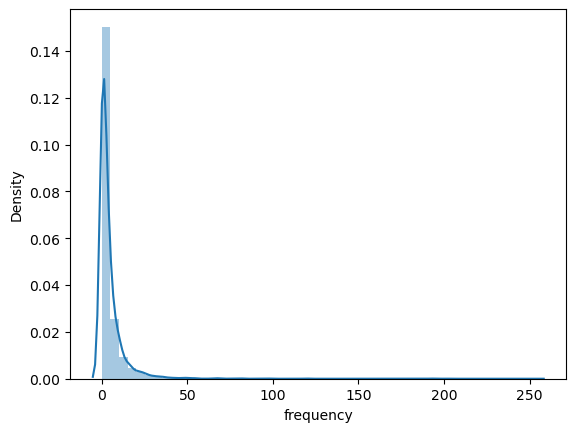

In [71]:
import seaborn as sns
ax = sns.distplot(df_rfmt['frequency'])

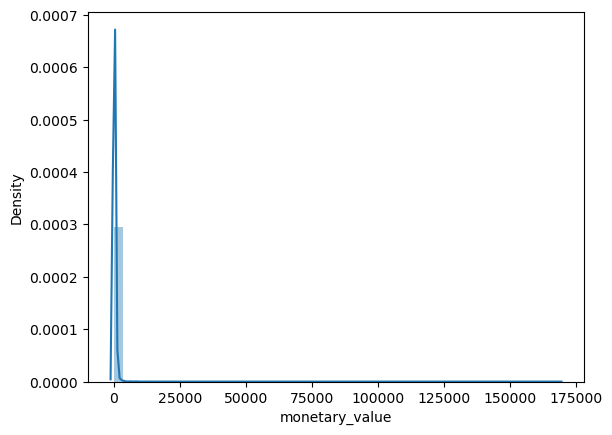

In [72]:
ax = sns.distplot(df_rfmt['monetary_value'])

In [73]:
#Frequency/Recency Analysis Using the BG/NBD Model
#
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0)
bgf.fit(df_rfmt['frequency'], df_rfmt['recency'], df_rfmt['T'])
bgf.summary


,coef,se(coef),lower 95% bound,upper 95% bound
r,0.662128,0.015829,0.631104,0.693153
alpha,63.304228,1.940224,59.501389,67.107067
a,0.108308,0.015441,0.078044,0.138572
b,2.419930,0.526783,1.387435,3.452425


The matrix has the customer’s recency on the Y axis and the frequency on the X axis and the heatmap component is showing the predicted number of future purchases customers at intersecting points will make in one unit of time. The customers most likely to order are those who’ve placed lots of previous orders and have been seen relatively recently.

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

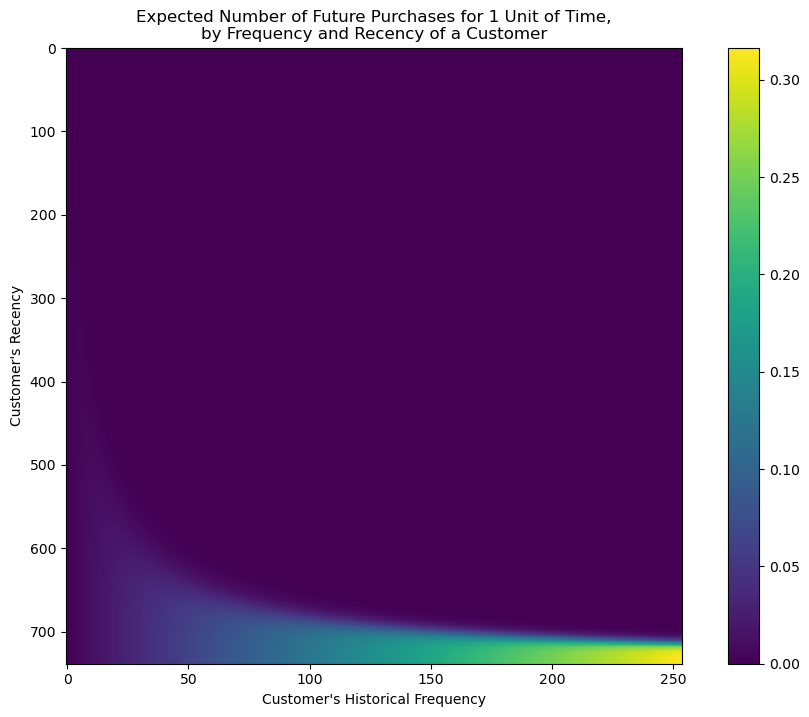

In [74]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

The next prediction we can visualise is the probability that each customer is “alive” based on their frequency and recency. We can do the whole thing by running plot_probability_alive_matrix(bgf) on the model we fitted earlier.

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

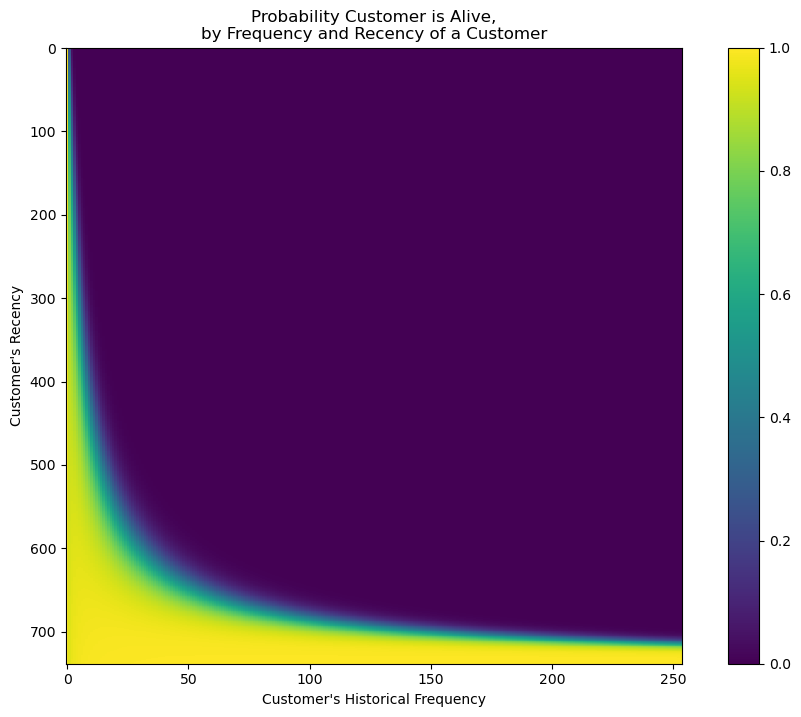

In [75]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [76]:
#Predict future transaction in next 365 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 365 days, based on historical data

t = 365
df_rfmt['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, df_rfmt['frequency'], df_rfmt['recency'], df_rfmt['T']),2)
df_rfmt.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,Customer ID,frequency,recency,T,monetary_value,pred_num_txn
0,14911,253.0,737.0,738.0,1150.208893,113.03
1,12748,201.0,735.0,735.0,271.482886,90.19
2,15311,194.0,738.0,738.0,590.374227,86.74
3,17841,192.0,736.0,737.0,361.984948,85.94
4,14606,180.0,735.0,736.0,166.472333,80.68
5,13089,129.0,735.0,737.0,885.785969,57.82
6,14527,120.0,735.0,737.0,222.164167,53.80
7,14156,119.0,729.0,738.0,2600.354874,53.17
8,12971,98.0,721.0,724.0,161.559796,44.69
9,13798,97.0,730.0,731.0,741.684433,43.87


assesing how well the BetaGeoFitter BG/NBD model fits to our data. The plot_period_transactions() function will compare the actual observations from a previous time period to the model’s prediction for that time period. As you can see, the two are almost identical, which shows that the model is a very good fit and predicts the number of periods in the calibration period rather well.

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

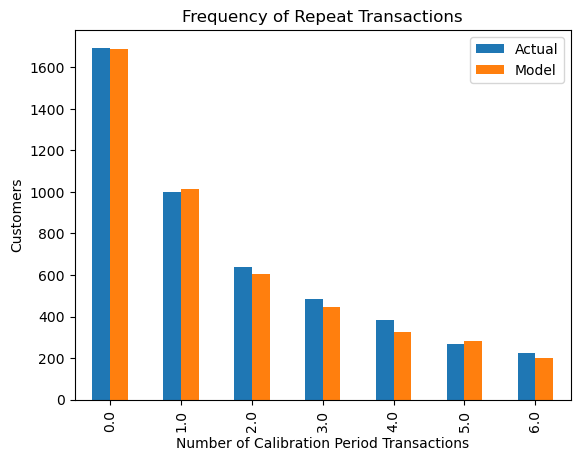

In [77]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

The calibration period starts from the date of the first transaction in our dataset and ends here on 2011-06-01. Immediately after this period the observation period starts, and this ends on 2011-12-09. We therefore have several years of data in the calibration period and six months in the observation period

In [79]:
summary_cal_holdout = calibration_and_holdout_data(tx_data, 
                                                   'Customer ID', 
                                                   'InvoiceDate',
                                                    calibration_period_end='2011-06-01',
                                                    observation_period_end='2011-12-09')
summary_cal_holdout.sort_values(by='frequency_holdout', ascending=False).head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
14911,168.0,541.0,547.0,85.0,191.0
12748,129.0,543.0,544.0,72.0,191.0
17841,124.0,545.0,546.0,68.0,191.0
15311,146.0,542.0,547.0,48.0,191.0
14606,137.0,545.0,545.0,43.0,191.0


In [80]:
bgf.fit(summary_cal_holdout['frequency_cal'], 
        summary_cal_holdout['recency_cal'], 
        summary_cal_holdout['T_cal'])

<lifetimes.BetaGeoFitter: fitted with 4934 subjects, a: 0.16, alpha: 66.11, b: 3.34, r: 0.68>

lines are pretty close together. The model is not far off at predicting the number of orders each customer will make.

<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

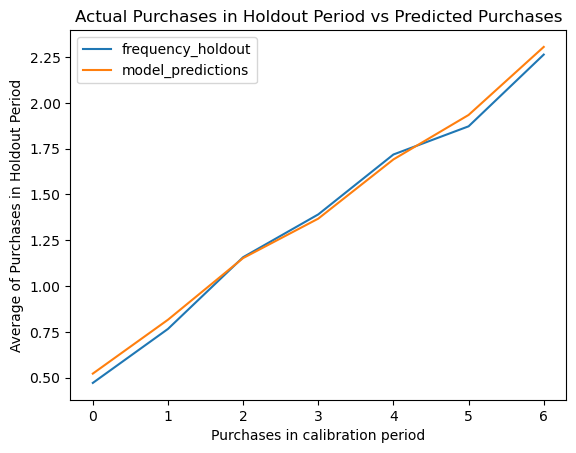

In [81]:
bgf.fit(summary_cal_holdout['frequency_cal'], 
        summary_cal_holdout['recency_cal'], 
        summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

If we want to generate predictions for specific customers you can simply pass in their index using iloc and extract their recency, frequency and T values from the calculated data and give them to the model to obtain a prediction.

In [82]:
t = 365
individual = df_rfmt.iloc[1]
bgf.predict(t, 
            individual['frequency'], 
            individual['recency'], 
            individual['T'])

5.622163803470087

In [83]:
example_customer_orders = tx_data.loc[tx_data['Customer ID'] == 15311]
example_customer_orders

,Customer ID,InvoiceDate,Total_Sales
291,15311,2009-12-01,76.32
292,15311,2009-12-01,91.80
293,15311,2009-12-01,102.00
294,15311,2009-12-01,66.00
295,15311,2009-12-01,68.00
...,...,...,...
791395,15311,2011-12-09,66.24
791396,15311,2011-12-09,88.80
791397,15311,2011-12-09,81.36
791398,15311,2011-12-09,0.21


In [84]:
from matplotlib.figure import Figure
#figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')

#days_since_birth = 118
#plot_history_alive(bgf, days_since_birth, example_customer_orders, 'InvoiceDate')

In [85]:
returning_customers = df_rfmt[ (df_rfmt['frequency'] > 0) & (df_rfmt['monetary_value'] > 0)]
returning_customers.sort_values(by='monetary_value', ascending=False).head()

,frequency,recency,T,monetary_value,pred_num_txn
Customer ID,,,,,
16446,1.0,205.0,205.0,168469.600000,2.08
15749,1.0,97.0,332.0,21535.900000,1.24
12346,7.0,400.0,725.0,11066.637143,1.98
18102,66.0,738.0,738.0,9157.649242,29.68
12536,1.0,16.0,59.0,8322.120000,4.22


### Assumptions
1) assumes that monetary value and frequency are independent variables and aren’t correlated with each other. For this reason, the monetary value you use here is based on the mean value of their orders rather than the total revenue, which obviously would be correlated.

2) assumes that the monetary value of a customer’s transactions will vary randomly around their average order value, and that average order value varies across customers but doesn’t usually vary much within customers and is independent of the transaction process.

In [86]:
returning_customers[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.022657
frequency,0.022657,1.000000


In [87]:
#fitting gamma gamma model
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers['frequency'],
        returning_customers['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 4180 subjects, p: 2.10, q: 3.54, v: 489.36>

In [88]:
predicted_monetary = ggf.conditional_expected_average_profit(
        returning_customers['frequency'],
        returning_customers['monetary_value']
)

In [89]:
#aov_df = pd.DataFrame(predicted_monetary,columns = ['aov'])
#aov_df = aov_df.sort_values(by='aov', ascending=False)

In [90]:
#aov_df.head(5)

predicting Customer Lifetime Value. To do this we’ll use both models - the BG/NBD model to predict the number of orders and the Gamma-Gamma model to predict their values. First we’ll re-fit the BetaGeoFitter BG/NBD model to our dataset for the returning customers, which includes the monetary data.

In [91]:
bgf.fit(returning_customers['frequency'], 
        returning_customers['recency'], 
        returning_customers['T'])

<lifetimes.BetaGeoFitter: fitted with 4180 subjects, a: 0.10, alpha: 104.91, b: 1.11, r: 1.54>

we’ll use the Gamma-Gamma model’s customer_lifetime_value() function to predict their value. We’ll pass in the bgf model, along with the recency, frequency, monetary_value, and T data for each customers. The time parameter is in months and defines how many months into the future we wish to predict.

In [92]:
#discount_rate:-  it relates to discounted cash flow (DCF), which is a financial measure for adjusting the cost of capital. This is a monthly adjusted discount rate and uses a default value of 0.01 in this package

In [93]:
preds = ggf.customer_lifetime_value(
    bgf,
    returning_customers['frequency'],
    returning_customers['recency'],
    returning_customers['T'],
    returning_customers['monetary_value'],
    time = 12,
    discount_rate = 0.01
)

preds = preds.to_frame().reset_index()

In [102]:
preds.rename(columns={'clv': 'Future_CLTV'}, inplace=True)

In [103]:
preds.sort_values(by='Future_CLTV', ascending=False).head(15)

,Customer ID,Future_CLTV
4043,18102,238375.188399
1609,14646,201957.236691
2875,16446,181097.426654
3598,17450,126109.926120
1249,14156,121697.021573
1792,14911,114606.525786
1206,14096,100143.022848
912,13694,74795.257937
4169,10266101,74294.318607
3643,17511,66557.247540


In [105]:
preds.Future_CLTV = preds.Future_CLTV.round()
preds

,Customer ID,Future_CLTV
0,12346,15930.0
1,12347,3506.0
2,12348,1356.0
3,12349,1866.0
4,12352,2117.0
...,...,...
4175,10435108,6707.0
4176,10540123,4220.0
4177,10552119,10725.0
4178,10555122,3194.0


In [118]:
preds.to_csv("Future CLTV for entire data.csv",index=False)

In [110]:
intersected_df1 = pd.merge(only_mapped, preds, how='inner')
intersected_df1

,Customer ID,Future_CLTV
0,10270114,3681.0
1,10267113,2673.0
2,10177110,7311.0
3,10435108,6707.0
4,10283100,3398.0
5,10232116,8753.0
6,10190102,2688.0
7,10376118,5328.0
8,10334112,4619.0
9,10568107,15467.0


In [115]:
intersected_df1.to_csv("model_output_file1.csv",index=False)

In [ ]:
#Saving to a csv
only_mapped["Mapped_customer ID"] = mapped_dict.values()

In [117]:
only_mapped.head()

,Customer ID,Mapped_customer ID
0,10270114,12490
1,10267113,12484
2,10177110,12476
3,10435108,12472
4,10283100,12359


In [116]:
#Saving to a csv
only_mapped.to_csv("Customer ID mapped.csv", index = False)